In [107]:
#Imports
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")

#Returns two lists that contain the kinematics of the function
def getkinematics(numSets):
    k = []
    QQ = []
    xb = []
    t = []
    for i in range(numSets):
        kvar, Q, x, ts = df.loc[45 * i, 'k': 't']
        
        k.append(kvar)
        QQ.append(Q)
        xb.append(x)
        t.append(ts)
    
    return k, QQ, xb, t

def getColorMappingValues(errF, amountofSets):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
        
        # NOTE we take max(mean, -1) because if data is more than 100% error it should just cap in terms of heatmapping
        #Inverted as smaller values are red and larger values are green
        #Want to make opposite (smaller %error-values = green and larger %error-values = red
        ReHMean.append(max(-abs(np.mean(data.ReH)), -1))
        ReEMean.append(max(-abs(np.mean(data.ReE)), -1))
        ReHtildeMean.append(max(-abs(np.mean(data.ReHtilde)), -1))

    return ReHMean, ReEMean, ReHtildeMean    

def threePlots(errF, numSets):
        plt.style.use('bmh')
        h, e, tilde = getColorMappingValues(errF, numSets)
        _, _, xb, t = getkinematics(numSets)
        
        # xb.extend([0, -0.5])
        # t.extend([0, -0.5])

        # h.extend([0, -1])
        # e.extend([0, -1])
        # tilde.extend([0, -1])

        fig, axes = plt.subplots(1, 3)
        fig.suptitle('Percent Error on Predictions for CFFs with ' + str(100 * errF) + "% Error on F")
        
        axes[0].set_title('ReH')
        axes[0].scatter(xb, t, c=h, cmap='RdYlGn')
        axes[0].set(ylabel='t')
        

        axes[1].scatter(xb, t, c=e, cmap='RdYlGn')
        axes[1].set_title('ReE')

        axes[2].scatter(xb, t, c=tilde, cmap='RdYlGn')
        axes[2].set_title('ReHtilde')

        fig.set_size_inches(18.5, 4.5, forward=True)
        
        for ax in axes:
            ax.set(xlabel='x_b')

# Plots for Percent Error on F vs Percent Error in CFF predictions

0% Error for Percent Error Accuracy

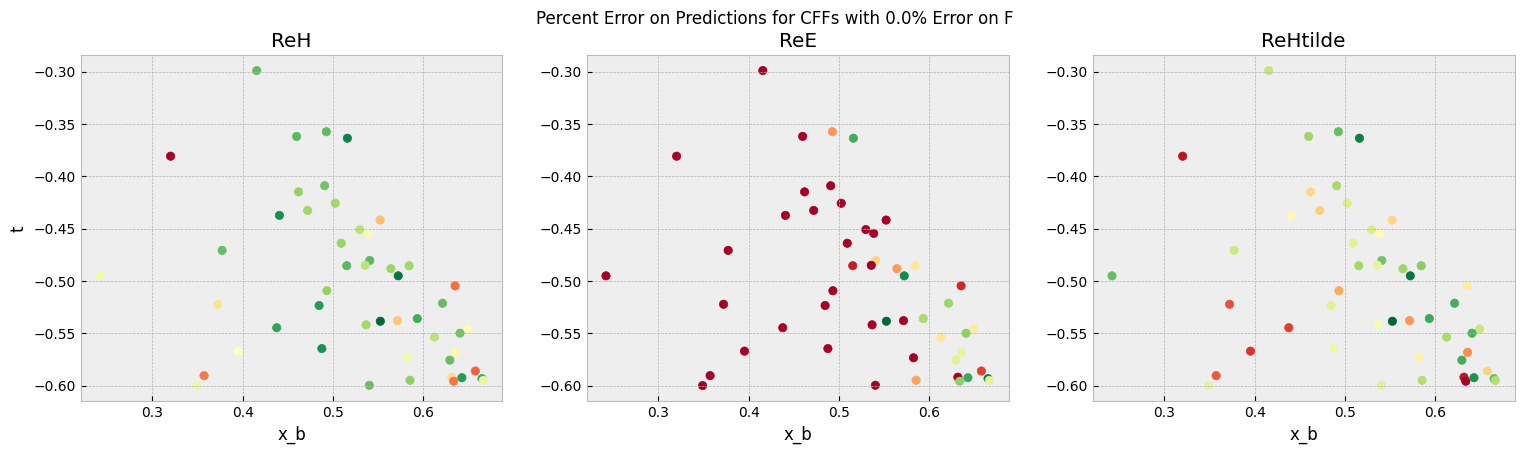

In [108]:
threePlots(0.0, 50)

5% Error For Percent Error Accuracy

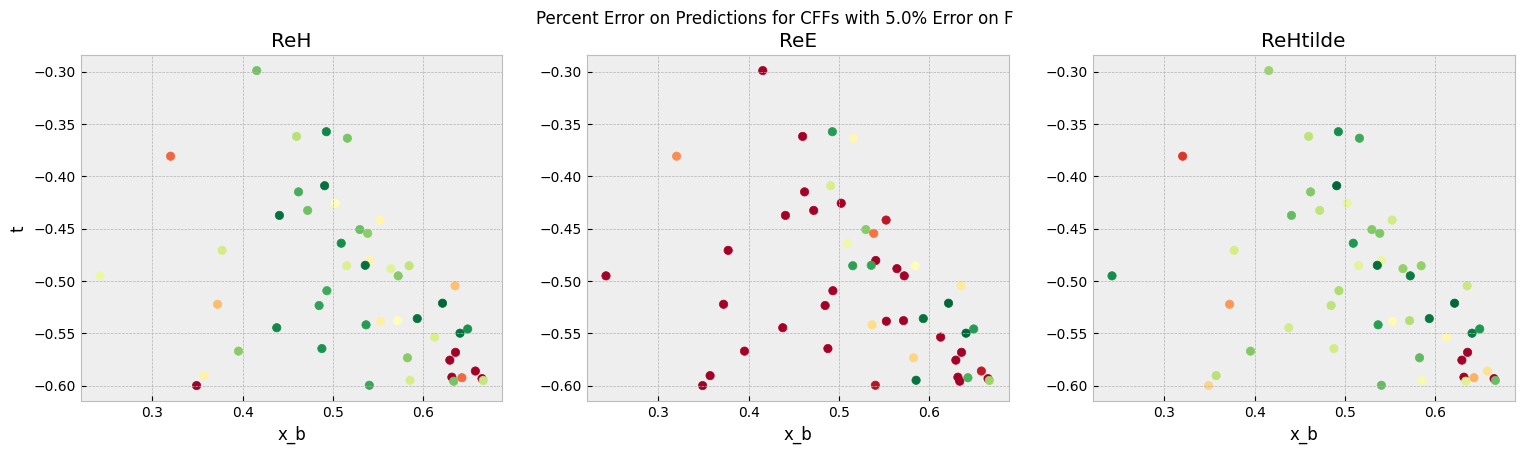

In [109]:
threePlots(0.05, 50)

30% Error for Percent Error Accuracy

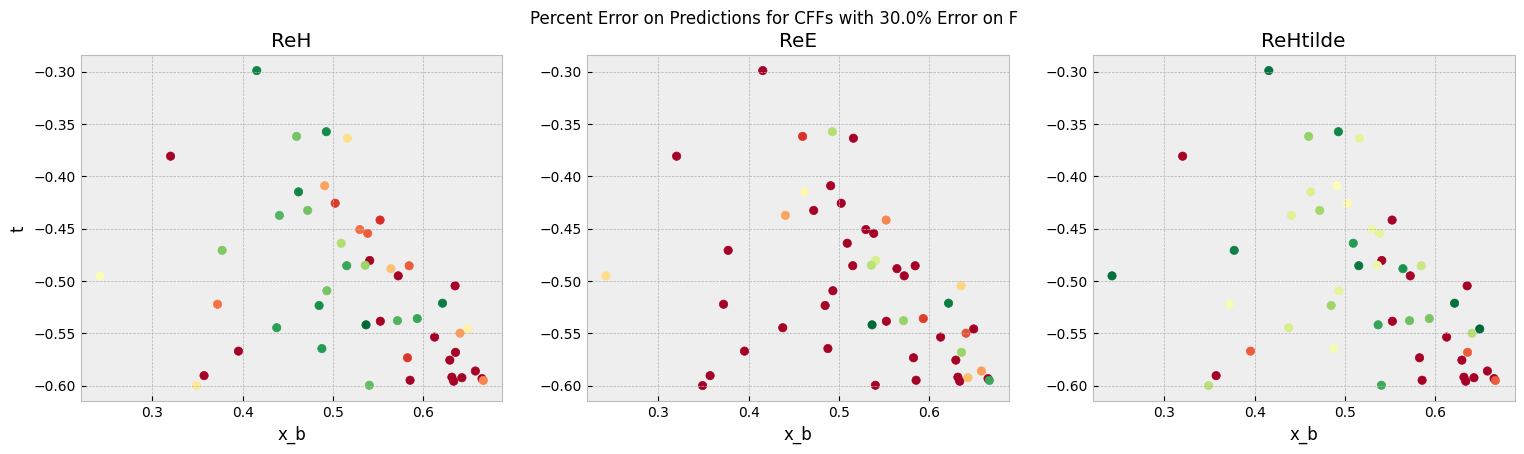

In [110]:
threePlots(0.3, 50)